In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Specify the name of your Excel file
excel_file_name = 'training_retail_supply_chain_data.xlsx'

# Construct the full path to the Excel file
file_path = os.path.join('/content/sample_data/')

df = pd.read_excel('/content/training_retail_supply_chain_data_test.xlsx')

In [8]:
df.head()

Date  Product_ID Product_Name     Category  Units_Sold  Revenue  \
0 2023-01-01         199    Product E         Home          24     3930   
1 2023-01-02         154    Product E         Toys          46     4153   
2 2023-01-03         190    Product C  Electronics          19     2815   
3 2023-01-04         192    Product C  Electronics          30     4873   
4 2023-01-05         137    Product B        Books          30     4981   

   Stock_Level  Reorder_Threshold  Supplier_ID  Supplier_Rating  \
0           15                 18          287                3   
1          138                 32          291                7   
2          259                 16          263                9   
3           71                 24          242                8   
4           99                 41          228                2   

   Discount_Applied  Return_Flag  
0                20            0  
1                10            1  
2                 0            1  
3                 0            0  
4                 0            1

In [9]:

## checking the shape of the data frame
print(f'no.of rows: {df.shape[0]}')
print(f'no.of columns: {df.shape[1]}')


no.of rows: 10000
no.of columns: 12


In [10]:
## check for null values
df.isnull().sum()


Date                 0
Product_ID           0
Product_Name         0
Category             0
Units_Sold           0
Revenue              0
Stock_Level          0
Reorder_Threshold    0
Supplier_ID          0
Supplier_Rating      0
Discount_Applied     0
Return_Flag          0
dtype: int64

In [11]:
# checking the statistics of the data
df.describe()

Date   Product_ID    Units_Sold       Revenue  \
count                          10000  10000.00000  10000.000000  10000.000000   
mean   2036-09-08 12:00:00.000000256    149.50920     30.775600   3034.553000   
min              2023-01-01 00:00:00    100.00000     10.000000   1000.000000   
25%              2029-11-04 18:00:00    125.00000     20.000000   2000.750000   
50%              2036-09-08 12:00:00    150.00000     30.000000   2990.000000   
75%              2043-07-14 06:00:00    174.00000     40.000000   4030.250000   
max              2050-05-18 00:00:00    199.00000    199.000000   9953.000000   
std                              NaN     28.73655     16.941268   1247.795756   

        Stock_Level  Reorder_Threshold   Supplier_ID  Supplier_Rating  \
count  10000.000000        10000.00000  10000.000000     10000.000000   
mean     174.283200           31.90520    249.630100         4.978400   
min       15.000000           15.00000    200.000000         1.000000   
25%      112.000000           23.00000    225.000000         3.000000   
50%      173.000000           32.00000    250.000000         5.000000   
75%      236.000000           41.00000    274.000000         7.000000   
max      299.000000           49.00000    299.000000         9.000000   
std       72.021589           10.11593     28.815324         2.616337   

       Discount_Applied   Return_Flag  
count      10000.000000  10000.000000  
mean          10.068500      0.099200  
min            0.000000      0.000000  
25%            5.000000      0.000000  
50%           10.000000      0.000000  
75%           15.000000      0.000000  
max           20.000000      1.000000  
std            7.127264      0.298945

In [12]:
df.columns

Index(['Date', 'Product_ID', 'Product_Name', 'Category', 'Units_Sold',
       'Revenue', 'Stock_Level', 'Reorder_Threshold', 'Supplier_ID',
       'Supplier_Rating', 'Discount_Applied', 'Return_Flag'],
      dtype='object')

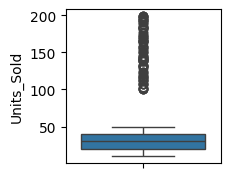

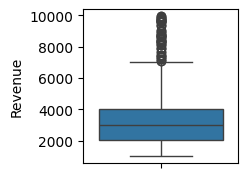

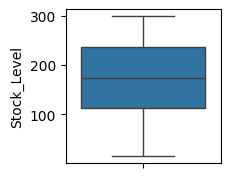

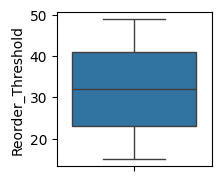

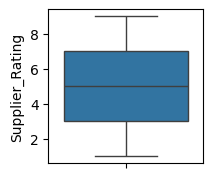

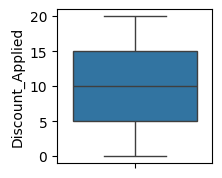

In [13]:
# ploting the outliers for the numeric columns using boxplot
cols = ['Units_Sold','Revenue', 'Stock_Level', 'Reorder_Threshold',
       'Supplier_Rating', 'Discount_Applied']
for i in cols:
  plt.figure(figsize=(2,2))
  sns.boxplot(df[i])

In [14]:
# load the above outliers into other data frame, considering only upper cutoff since no outliers in lower cutoff region
# lower_cutoff_R = df['Revenue'].quantile(0.05)
upper_cutoff_R = df['Revenue'].quantile(0.95)
# lower_cutoff_U = df['Units_Sold'].quantile(0.05)
upper_cutoff_U = df['Units_Sold'].quantile(0.95)

df_outliers = df[(df['Revenue'] > upper_cutoff_R) | (df['Units_Sold'] > upper_cutoff_U)]


In [15]:
df_outliers.head()


Date  Product_ID Product_Name     Category  Units_Sold  Revenue  \
3  2023-01-04         192    Product C  Electronics          30     4873   
4  2023-01-05         137    Product B        Books          30     4981   
28 2023-01-29         132    Product E  Electronics          32     4959   
40 2023-02-10         147    Product A         Toys         159     7080   
43 2023-02-13         172    Product E         Home          49     4227   

    Stock_Level  Reorder_Threshold  Supplier_ID  Supplier_Rating  \
3            71                 24          242                8   
4            99                 41          228                2   
28          214                 35          201                7   
40          284                 48          210                8   
43          197                 36          225                2   

    Discount_Applied  Return_Flag  
3                  0            0  
4                  0            1  
28                20            0  
40                 5            0  
43                10            0

In [19]:
# Output the outliers into excel file
import os


downloads_folder = os.path.expanduser('~/Downloads')
excel_file_path = os.path.join(downloads_folder, 'Outliers_Output_file.xlsx')
os.makedirs(downloads_folder, exist_ok=True )

        # Export DataFrame to Excel
df_outliers.to_excel(excel_file_path, index=False)

<Axes: >

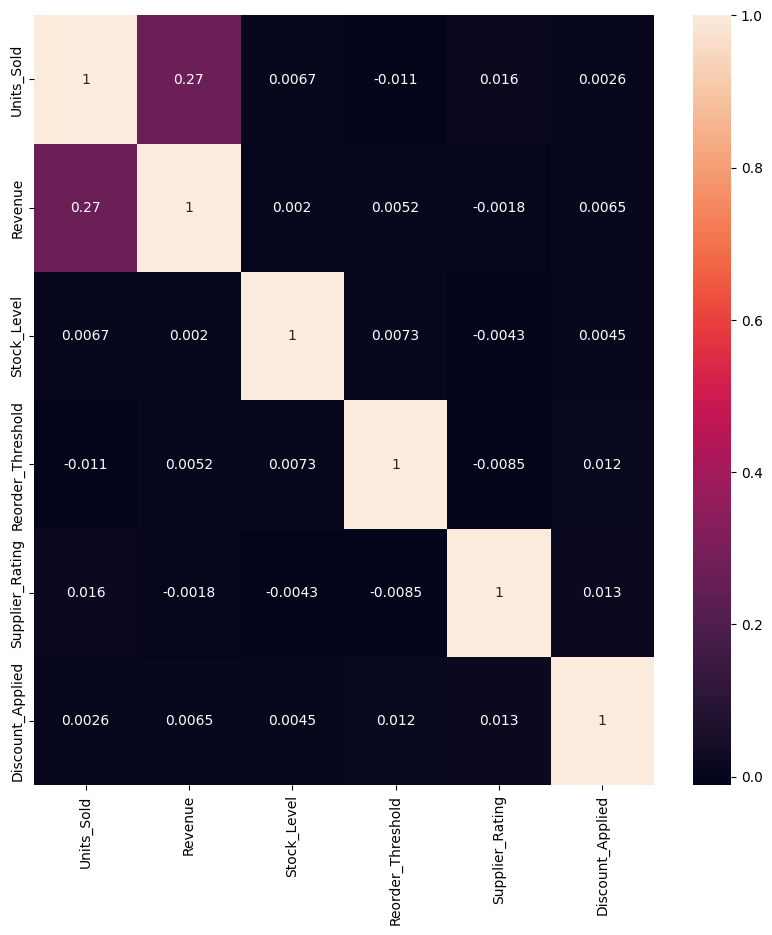

In [20]:
# plot a heat map for correlation amoung the numeric columns
cols = ['Units_Sold','Revenue', 'Stock_Level', 'Reorder_Threshold',
       'Supplier_Rating', 'Discount_Applied']
plt.figure(figsize=(10,10))
sns.heatmap(df[cols].corr(), annot=True)

In [17]:
## target encode category column, consider the target as revenue
df['Category'] = df.groupby('Category')['Revenue'].transform('mean')
df['Category'].head()

0    3053.652262
1    3016.911850
2    3024.912602
3    3024.912602
4    3097.844149
Name: Category, dtype: float64

In [18]:
# splitting the data
from sklearn.model_selection import train_test_split
X = df[['Units_Sold','Category','Stock_Level']]
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
# normalize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# converting the normalised data to dataframes
X_train = pd.DataFrame(X_train, columns=['Units_Sold','Category','Stock_Level'])
X_test = pd.DataFrame(X_test, columns=['Units_Sold','Category','Stock_Level'])

In [23]:
# import the models Linear Regression, Decision Tree, Random Forest
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# import the metrics mean square error and r2 score
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
# creating the models for each regressor
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

In [25]:
# predict the y values and calculate the metrics for each model and store the metrics in a dictionary
metrics = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: MSE = {mse:.2f}, R2 = {r2:.2f}')
    metrics[name] = {'MSE': mse, 'R2': r2}

Linear Regression: MSE = 1408665.48, R2 = 0.08
Decision Tree: MSE = 2731421.29, R2 = -0.79
Random Forest: MSE = 1604754.35, R2 = -0.05


In [ ]:
## Outputting the Regression metrics to txt file
new_filename = 'Output_Regression_metrics.txt'
data_validation_file_path = os.path.join(downloads_folder, new_filename)

with open(data_validation_file_path, 'a') as f:
    f.write(f"\n Report for the Build:\n ")
    f.write(f"Regression Metrics :{metrics}\n ")
    f.close()

In [ ]:
########################  Classification #################################

In [26]:
# splitting the data
from sklearn.model_selection import train_test_split
X = df[['Units_Sold','Category','Stock_Level']]
y = df['Return_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [27]:
# normalize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# converting the normalised data to dataframes
X_train = pd.DataFrame(X_train, columns=['Units_Sold','Category','Stock_Level'])
X_test = pd.DataFrame(X_test, columns=['Units_Sold','Category','Stock_Level'])

In [30]:
# import the models Logistic Regression, Naive Bayes Classification
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
# import the metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [31]:
# creating the models for each classifier
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB()
}

In [32]:
# predict the y values and calculate the metrics for each model and store the metrics in a dictionary
import warnings
warnings.filterwarnings("ignore")
metrics = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'{name}: Accuracy = {accuracy:.2f}, Precision = {precision:.2f}, Recall = {recall:.2f}, F1 = {f1:.2}')
    metrics[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1}

Logistic Regression: Accuracy = 0.90, Precision = 0.00, Recall = 0.00, F1 = 0.0
Naive Bayes: Accuracy = 0.90, Precision = 0.00, Recall = 0.00, F1 = 0.0


In [33]:
## Outputting the Classification metrics to txt file
new_filename = 'Output_Classification_metrics.txt'
data_validation_file_path = os.path.join(downloads_folder, new_filename)

with open(data_validation_file_path, 'a') as f:
    f.write(f"\n Report for the Build:\n ")
    f.write(f"Regression Metrics :{metrics}\n ")
    f.close()